In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from tqdm import tqdm
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud


In [ ]:

train_data =[]
train_target = []
test_data = []
test_target=[]

with open('/content/drive/MyDrive/ColabNotebooks/subreddit-comments-dl-master/src/models/reddit_train.csv','rt')as f:
  all = csv.reader(f)
  for row in all:
    train_data.append(row[1])
    train_target.append(row[2])
with open('/content/drive/MyDrive/ColabNotebooks/subreddit-comments-dl-master/src/models/reddit_test.csv','rt')as f:
  all = csv.reader(f)
  temp = []
  for row in all:
    test_data.append(row[1])
    test_target.append(row[2])
  test_target = np.array(test_target)


In [ ]:
print(len(train_target))
print(len(train_data))

2974
2974


In [ ]:

import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


##preprocess train
preprocessed_train = []
allwords = []

for sentence in train_data[1:]:
    
    sentence=sentence.lower()
    #remove \n
    sentence = re.sub(r"\\n","", sentence)

    # removing links from text data
    sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)

    #removing extra white space
    split = sentence.split()
    sentence = " ".join(split)
    sentence = remove_emojis(sentence)
    for word in split:
      if word not in stopwords.words('english'):
        allwords.append(word)
    preprocessed_train.append(sentence)

print(len(train_data))
print(len(preprocessed_train))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2974
2973


In [ ]:
preprocessed_test = []
for sentence in test_data[1:]:
    
    sentence=sentence.lower()
    #remove \n
    sentence = re.sub(r"\\n","", sentence)

    # removing links from text data
    sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)

    #removing extra white space
    split = sentence.split()
    sentence = " ".join(split)
    sentence = remove_emojis(sentence)
    preprocessed_test.append(sentence)

In [ ]:

train_target = train_target[1:]
test_data = test_data[1:]
test_target = test_target[1:]
print(len(train_target))


2973


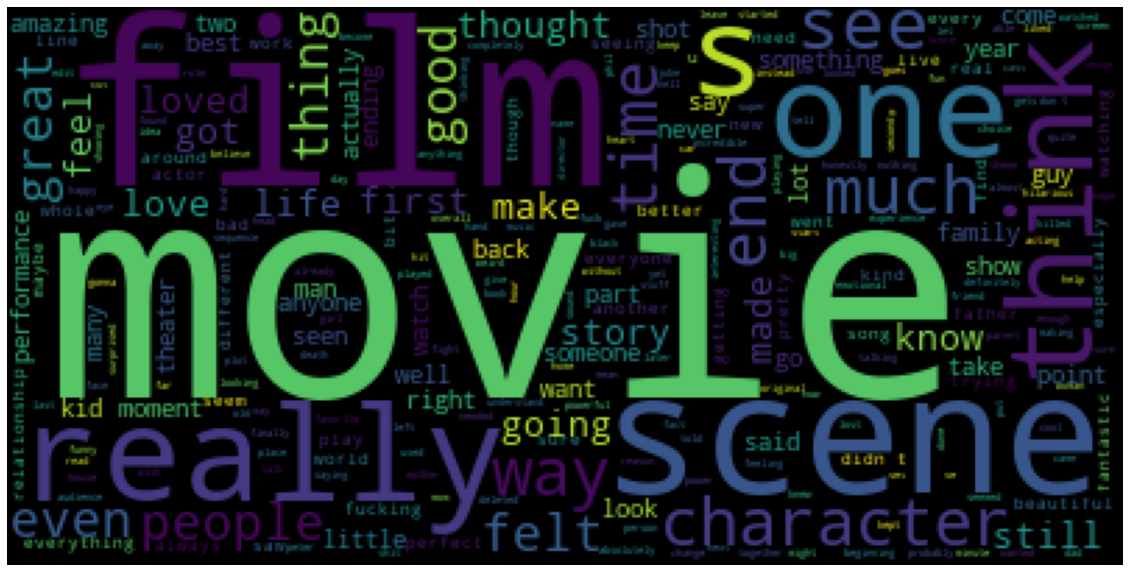

In [ ]:
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in allwords))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:

vectorizer=TfidfVectorizer(max_features=5000,stop_words='english')
vectorizer.fit(train_data)


print("transforming the data")
train_post=vectorizer.transform(preprocessed_train).toarray()
test_post=vectorizer.transform(preprocessed_test).toarray()

target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_target)
test_target=target_encoder.fit_transform(test_target)

train_target = np.array(train_target)
train_data = np.array(preprocessed_train)
test_data = np.array(test_data)
test_target = np.array(test_target)

models_accuracy={}
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)

print(train_post[:3])
print(train_target[:3])
print("begin training")
model_log.fit(train_post,train_target)
print("finish training")
indicator = ["0", "1"]
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post), target_names = indicator))

print('test classification report \n',classification_report(test_target,model_log.predict(test_post), target_names = indicator))

transforming the data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0]
begin training
finish training
train classification report 
                precision    recall  f1-score   support

           0       0.73      1.00      0.84      2026
           1       1.00      0.21      0.34       947

    accuracy                           0.75      2973
   macro avg       0.86      0.60      0.59      2973
weighted avg       0.82      0.75      0.68      2973

test classification report 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.77      0.87        13

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.90        36
weighted avg       0.93      0.92      0.91        36

